In [1]:
from utils import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.morphology import skeletonize
from sklearn.cluster import KMeans

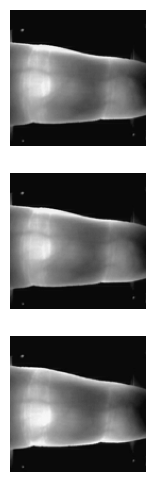

In [24]:
input_imgs = [
    '../data/fingervein-uniform_128/105_rightflipped_index_1.bmp',
    '../data/fingervein-uniform_128/105_rightflipped_index_2.bmp',
    '../data/fingervein-uniform_128/105_rightflipped_index_3.bmp',
]


imgs = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in input_imgs]

fig, ax = plt.subplots(len(imgs), 1, figsize=(2, len(imgs)*2))
    
for i, img in enumerate(imgs):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')

In [25]:
def segment_three_piece(image):
    image_reshaped = image.reshape((-1, 1))
    n_segments = 3
    kmeans = KMeans(n_clusters=n_segments)
    kmeans.fit(image_reshaped)
    segmented_image = kmeans.labels_.reshape(image.shape).astype(np.uint8)
    #this is just for vizualization
    equalized_image = cv2.equalizeHist(segmented_image)
    return equalized_image

In [26]:
def grabcut_segment_mask(grayscale_image):

    image_width = 128
    image_height = 128

    rect_width = 128
    rect_height = 105

    # Calculate the top-left corner coordinates for the rectangle
    x = (image_width - rect_width) // 2  # Aligning center horizontally
    y = (image_height - rect_height) // 2  # Aligning center vertically

    # Define the rectangle
    rect = (x, y, rect_width, rect_height)

    image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2BGR)

    mask = np.zeros(grayscale_image.shape, np.uint8)

    # Apply GrabCut with rect as the initial approximation
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    return np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')


In [27]:
def apply_mask(image, mask):
    return cv2.bitwise_and(image, image, mask=mask)

c:\Users\colino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\colino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\colino\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


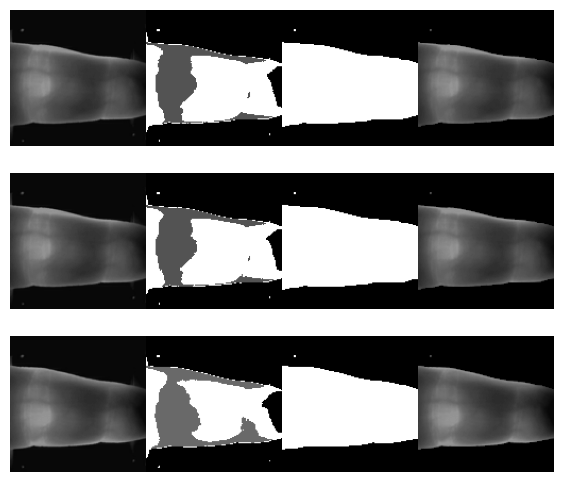

In [28]:
imgs_kmeans_segmented = [segment_three_piece(img) for img in imgs]
imgs_grabcut_mask = [grabcut_segment_mask(img) for img in imgs]
imgs_grabcut_masked = [apply_mask(img, mask) for img, mask in zip(imgs, imgs_grabcut_mask)]


fig, ax = plt.subplots(len(imgs), 1, figsize=(12, len(imgs)*2))

for i, img in enumerate(imgs):
    

    img_show = cv2.hconcat([img, imgs_kmeans_segmented[i], imgs_grabcut_mask[i], imgs_grabcut_masked[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')

In [29]:
def rotate_image_90(img):
    return np.rot90(img, 2)

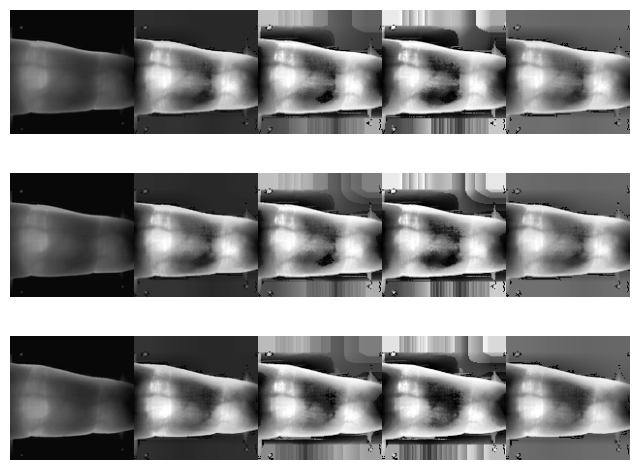

In [30]:
clip_limit = 32
grid_size = (4, 4)

imgs_eq = [clahe(img, clip_limit, grid_size) for img in imgs]
imgs_eq2 = [clahe(img, clip_limit, grid_size) for img in imgs_eq]
imgs_eq3 = [clahe(img, clip_limit, grid_size) for img in imgs_eq2]
imgs_eq13 = [clahe(img, clip_limit*3, grid_size) for img in imgs]

fig, ax = plt.subplots(len(imgs), 1, figsize=(8, len(imgs)*2))
    
for i, img in enumerate(imgs):
    img_show = cv2.hconcat([img, imgs_eq[i], imgs_eq2[i], imgs_eq3[i], imgs_eq13[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')

imgs_eq = imgs_eq3

In [31]:
def display_filter(filter):

    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    
    ax.imshow(filter, cmap='gray', interpolation='none')
    ax.axis('off')
    

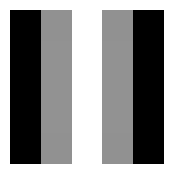

In [32]:
# Define your custom parameters
ksize = 5
theta = np.pi  # Vertical orientation
sigma = 3.0
lambd = 5
gamma = 0.1
psi = 0

filter = gabor_filter(ksize, sigma, theta, lambd, gamma, psi)

display_filter(filter)

In [33]:
# inverted_img = invert(img_eq)
# inverted_img = img_eq
# filtered_img = apply_filter(inverted_img, filter)
# filtered2_img = remove_lines(inverted_img, filtered_img, 250)
# 
# img_show = cv2.hconcat([img_eq, inverted_img, filtered_img, filtered2_img])
# fig, ax = plt.subplots(1, 1, figsize=(8, 2))
# ax.imshow(img_show, cmap='gray', interpolation='none')
# ax.axis('off')

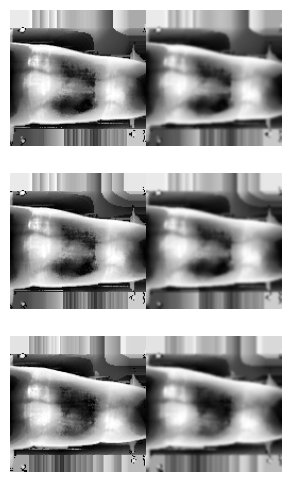

In [34]:
gaussian_blur_imgs = [gaussian_blur(img, 5, 1) for img in imgs_eq]

fig, ax = plt.subplots(len(imgs), 1, figsize=(4, len(imgs)*2))

for i, img in enumerate(imgs_eq):
    img_show = cv2.hconcat([img, gaussian_blur_imgs[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')

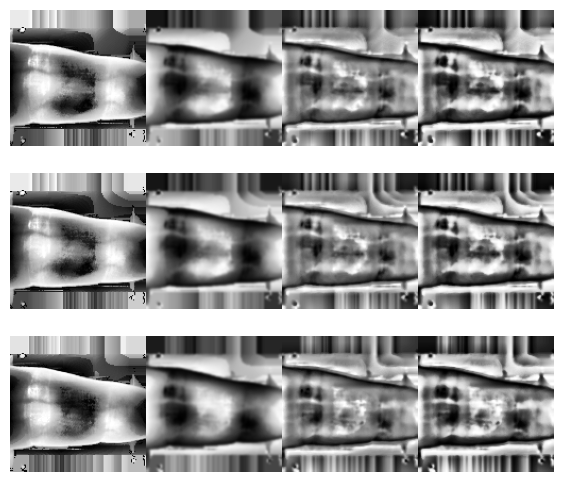

In [35]:
clip_limit_2 = 10
grid_size_2 = (12, 12)

inverted_gaussian_imgs = [invert(img) for img in gaussian_blur_imgs]
inverted_gaussian_imgs_cl = [clahe(img, clip_limit_2, grid_size_2) for img in inverted_gaussian_imgs]
inverted_gaussian_imgs_eq = [histogram_equalization(img) for img in inverted_gaussian_imgs_cl]

fig, ax = plt.subplots(len(imgs), 1, figsize=(12, len(imgs)*2))

for i, img in enumerate(imgs_eq):
    img_show = cv2.hconcat([img, inverted_gaussian_imgs[i], inverted_gaussian_imgs_cl[i], inverted_gaussian_imgs_eq[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')


In [36]:
def adaptive_threshold(img):
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 63, 5)
    return img

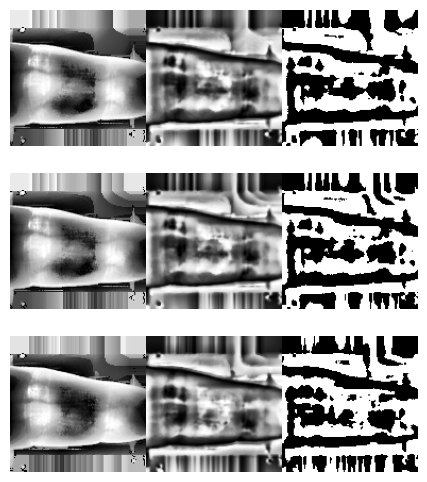

In [37]:
threshold = 110

imgs_thresh = [adaptive_threshold(img,) for img in inverted_gaussian_imgs_eq]

fig, ax = plt.subplots(len(imgs), 1, figsize=(6, len(imgs)*2))

for i, img in enumerate(imgs_eq):
    img_show = cv2.hconcat([img, inverted_gaussian_imgs_eq[i], imgs_thresh[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')

In [38]:
def isolate_finger(thresh_image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the contour corresponding to the central section
    central_contour = max(contours, key=cv2.contourArea)

    # Create a mask for the central section
    mask = np.zeros_like(thresh_image)
    cv2.drawContours(mask, [central_contour], -1, 255, thickness=cv2.FILLED)


    # Keep only the central section using the mask
    result_image = cv2.bitwise_and(thresh_image, mask)

    return result_image

In [44]:
def remove_noise(binary_image):
    # Apply erosion and dilation to remove noise
    kernel = np.ones((3, 3), np.uint8)  # Kernel for morphological operations

    # Erosion to remove small noise
    eroded_image = cv2.erode(binary_image, kernel, iterations=1)

    # Dilation to restore the structure while keeping noise removed
    cleaned_image = cv2.dilate(eroded_image, kernel, iterations=1)

    return cleaned_image

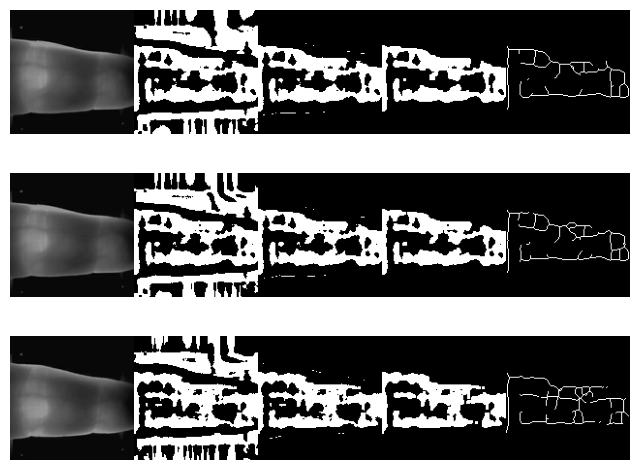

In [46]:
imgs_thresh_grabcut_masked = [apply_mask(img, mask) for img, mask in zip(imgs_thresh, imgs_grabcut_mask)]
imgs_thresh_grabcut_masked_cleaned = [remove_noise(img) for img in imgs_thresh_grabcut_masked]
skeletons = [skeletonize(img).astype(np.uint8)*255 for img in imgs_thresh_grabcut_masked_cleaned]   

fig, ax = plt.subplots(len(imgs), 1, figsize=(8, len(imgs)*2))

for i, img in enumerate(imgs):
    img_show = cv2.hconcat([img, imgs_thresh[i], imgs_thresh_grabcut_masked[i], imgs_thresh_grabcut_masked_cleaned[i], skeletons[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')

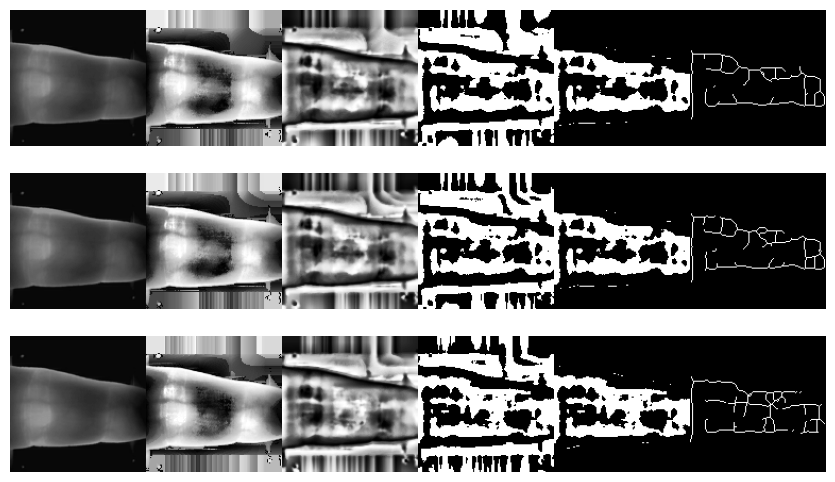

In [47]:
fig, ax = plt.subplots(len(imgs), 1, figsize=(20, len(imgs)*2))
for i, img in enumerate(imgs):
    img_show = cv2.hconcat([img, imgs_eq[i], inverted_gaussian_imgs_eq[i] , imgs_thresh[i], imgs_thresh_grabcut_masked[i], skeletons[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')